# 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 강사명 : 정지훈 강사
- 수강생명 : 한정인

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# File and Data Field Descriptions

- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - Destination - The planet the passenger will be debarking to.
    - Age - The age of the passenger.
    - VIP - Whether the passenger has paid for special VIP service during the voyage.
    - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - Name - The first and last names of the passenger.
    - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
    - PassengerId - Id for each passenger in the test set.
    - Transported - The target. For each passenger, predict either True or False.

# 파일 및 데이터 필드 설명
- train.csv - 승객의 약 3분의 2(~8700)에 대한 개인 기록으로, 훈련 데이터로 사용됩니다.
    - PassengerId - 각 승객의 고유 ID입니다. 각 ID는 ggg_pp 형식을 취하며, 여기서 ggg는 승객이 함께 여행하는 그룹을 나타내며, pp는 그룹 내 번호를 나타냅니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그렇지는 않다.
    - HomePlanet - 승객이 출발한 행성으로, 일반적으로 영구 거주지 행성입니다.
    - CryoSleep - 승객이 항해가 진행되는 동안 일시 정지 애니메이션으로 전환되도록 선택했는지 여부를 나타냅니다. 저온 수면 중인 승객들은 객실에 갇히게 된다.
    - 객실 - 승객이 머물고 있는 객실 번호입니다. 갑판/번호/측면 형식을 취합니다. 여기서 측면은 좌현에 P 또는 우현에 S가 될 수 있습니다.
    - 목적지 - 승객이 주차를 해제할 행성입니다.
    - 연령 - 승객의 연령입니다.
    - VIP - 승객이 여행 중 특별 VIP 서비스에 비용을 지불했는지 여부
    - 룸 서비스, 푸드 코트, 쇼핑 몰, 스파, VRDeck - 승객이 우주선 타이타닉의 많은 고급 편의 시설 각각에서 청구한 금액입니다.
    - 이름 - 승객의 이름과 성.
    - 운송됨 - 승객이 다른 차원으로 운송되었는지 여부. 예측하려는 대상 열입니다.
- test.csv - 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. 작업은 이 세트의 승객에 대한 운송 값을 예측하는 것입니다.
- sample_submission.csv - 올바른 형식의 송신 파일.
    - PassengerId - 테스트 세트에 포함된 각 승객의 ID입니다.
    - Transported - 타겟. 각 승객에 대해 참 또는 거짓을 예측합니다.

# Step 1. 라이브러리 및 데이터 불러오기

- 본 프로젝트 수행을 위한 필수 라이브러리를 불러온다. 

In [2]:
# 데이터 가공 
import numpy as np 
import pandas as pd 

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns 
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2


- 이번에는 주어진 데이터를 불러온다. 
- 훈련데이터는 8,693개, 테스트 데이터는 4,277개로 구성이 되어 있음
- 독립변수 컬럼 갯수는 13개이며, 종속 변수는 1개로 구성되어 있음

In [3]:
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
sample_submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

train_data.shape, test_data.shape, sample_submission.shape

((8693, 14), (4277, 13), (4277, 2))

In [4]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

In [6]:
train_data.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


- train_data에 대해 살펴본다. 
- 먼저, 결측치가 있는 코드들이 있지만, 전체적으로 많은 편은 아님. 
- bool(1), float64(6), object(10)개로 구성이 되어 있음. 

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Num           8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


- 테스트 데이터도 마찬가지로 비슷한 양상을 나타냄. 

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Deck          4177 non-null   object 
 14  Num           4177 non-null   object 
 15  Side          4177 non-null   object 
dtypes: float64(6), object(10)
memory usage: 534.8+ KB


- 예측해야 할 종속변수는 Transported 인 것으로 확인됨. 

In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


- 데이터 컬럼 확인
    + 각 데이터의 특성을 파악하기 위해서는 해당 설명서를 참조하는 것이 좋음. 
    + 출처 : https://www.kaggle.com/competitions/spaceship-titanic/data
- 본 포스트에서는 추가 설명은 생략함. 

- 대회주제
    + Transported Column 설명을 보면, 다른 차원으로 이동하기 위한, 각 승객의 탑승을 했는지 못했는지를 예측하는 문제이며, 평가지표는 정확도로 판정함.
- 분류 정확도(Classification Accuracy)의 설명은 [Classification Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)에서 확인할 수 있다. 

# Step 2. 탐색적 자료 분석 (EDA)
- 데이터 시각화
- 산점도, 막대 그래프 등
- 그래프 해석해서 설명을 달아야 함
- 약간의 데이터 전처리

## 데이터 시각화를 위한 주요 함수 작성
- 훈련데이터의 구조는 다음과 같다. 
    + dtypes: bool(1), float64(6), object(10)
- 우선, 종속변수인 bool의 갯수에 대해 확인한다. 
- 갯수로 파악할 때는 비율은 큰 차이가 없는 것으로 확인했다. 즉, 데이터는 매우 균등하게 구성이 된 것이다. 
- 추가적으로 Deck, Num, Side에 대해 파악한다

In [10]:
train_data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [11]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [12]:
train_data['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [13]:
train_data['Num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64

In [14]:
train_data['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [15]:
def cnt_bar(data, col_name):
    df = data[col_name].value_counts()
    fig, ax = plt.subplots(figsize=(10, 8))
    labels = [str(item) for item in list(data[col_name].value_counts().index)]
    bars = sns.countplot(x=col_name, data=data, color='lightgray', alpha=0.85, zorder=2, ax=ax)
    
    for bar in bars.patches:
        fontweight = "normal"
        color = "k"
        height = np.round(bar.get_height(), 2)
        if bar.get_height() == data[col_name].value_counts().values[0]:
            fontweight="bold"
            color="orange"
            bar.set_facecolor(color)
        ax.text(bar.get_x() + bar.get_width()/2., height+100, height+1, ha = 'center', size=12, fontweight=fontweight, color=color)
    ax.set_title(f'Bar Graph of {col_name}', size = 16)
    ax.set_xlabel(col_name, size = 16)
    ax.set_ylabel("No. Passengers", size = 16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position(("outward", 20))
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis="y", which="major", color="lightgray")
    ax.grid(axis="y", which="minor", ls=":")
    
    plt.show()

In [16]:
def cnt_donut(data, col_name):
    fig = go.Figure(data=[go.Pie(labels=data[col_name], hole=0.5)])
    fig.add_annotation(text=col_name,
                      x=0.5,y=0.5,showarrow=False,font_size=20,opacity=0.4)
    fig.update_layout(
        legend=dict(orientation='v',traceorder='reversed'),
        hoverlabel=dict(bgcolor='white'))
    fig.update_traces(textposition='outside', textinfo='percent+label')
    fig.show()

- 이제 함수를 적용해본다. 
    + Cabin이나, PassengerID 등에는 적용할 수 없다. 

In [17]:
cnt_donut(train_data, "Destination")

In [18]:
cnt_donut(train_data, "HomePlanet")

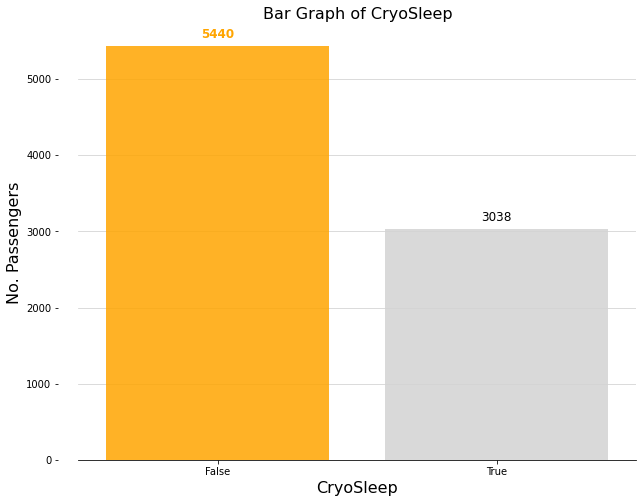

In [19]:
cnt_bar(train_data, "CryoSleep")

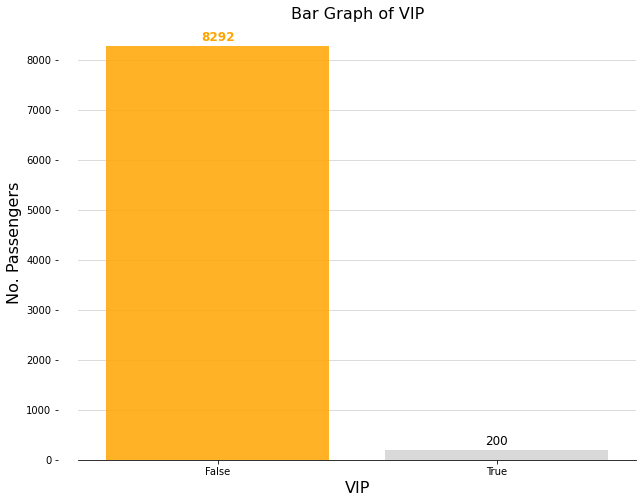

In [20]:
cnt_bar(train_data, "VIP")

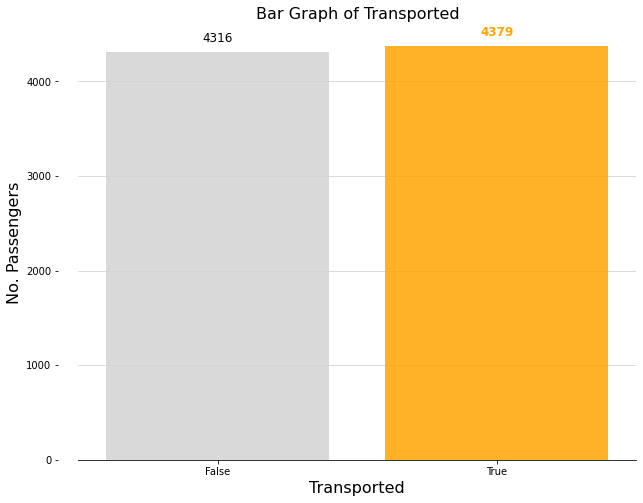

In [21]:
cnt_bar(train_data, "Transported")

In [22]:
cnt_donut(train_data, "Deck")

In [23]:
cnt_donut(train_data, "Side")

- 이번에는 Describe() 함수를 적용해본다. 

In [24]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [25]:
numeric_features = train_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

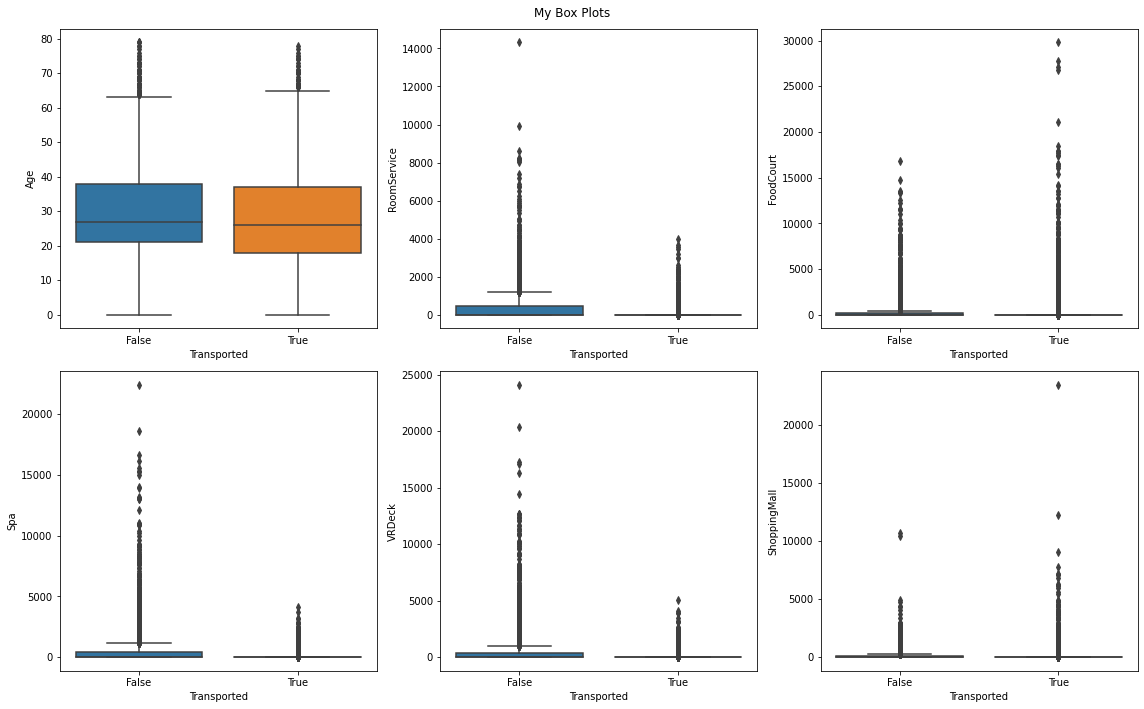

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = train_data.copy()
# data[numeric_features.columns].columns[0:]
for i, col in enumerate(data[numeric_features.columns].columns[0:]): # 좌표 평면 지정
    # print(i, col)
    if i <= 2:
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[0,i]) # 1행 좌표 평면
    else: 
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[1,i-4]) # 5행 좌표 평면
fig.suptitle('My Box Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

- 위 시각화 결과물을 놓고 보면, RoomService, FoodCount, Spa, VRDeck, ShoppingMall은 수치가 아닌 것처럼 보임. 

In [27]:
train_data['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [28]:
train_data['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [29]:
train_data['Spa'].value_counts()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

- 실제 컬럼명에서 말하는 것도 다음과 같음. 
    + RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- 즉, 위 데이터는 연속형 데이터라고 보기에는 비연속형 수치 데이터인 것을 확인함. 

# Step 3. 데이터 전처리
- Feature Engineering
- ML 모형을 돌리기 위해 표준화 등 / 원핫-인코딩
- 파생변수 (도출 변수)
    + 왜 이 변수를 만들었는지에 대한 여러분들의 설명 필요

## 불필요한 변수 제거 
- 모형에 쓰지 않을 변수들을 제거한다. 
    + PassengerId, Name, Carbin, Num
- Name은 모형을 개선할 때, 가족 유무 등 판단 시, 재활용할 가치는 있다.
- Cabin은 값을 분리했기 때문에 제거한다.
- 방 번호를 나타내는 값인 Num은 활용가치가 없어서 제거한다.

In [30]:
train_data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [31]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [32]:
train_data['Num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64

In [33]:
remove_cols = ['PassengerId', 'Name', 'Cabin', 'Num']
PassengerId = test_data['PassengerId']

print("Before:", train_data.shape, test_data.shape)
train_data = train_data.drop(remove_cols, axis=1)
test_data = test_data.drop(remove_cols, axis=1)

print("After:", train_data.shape, test_data.shape)

Before: (8693, 17) (4277, 16)
After: (8693, 13) (4277, 12)


## 결측치 
- 결측치 데이터를 추가하도록 한다. 결측치를 추가하기 위해 SimpleImputer 클래스를 사용하였다. 
- train_data의 결측치 패턴을 파악한 후, train_data 및 test_data 결과에도 적용한다. 
    + 주의 : 반드시 이렇게 해야 한다. (Data Leakage 방지)

In [34]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Side            199
dtype: int64

In [35]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Deck            100
Side            100
dtype: int64

- 결측치를 처리하기 위해 가장 쉬운 방법은 sklearn.impute 내에서의 SimpleImputer 클래스를 활용하는 것이다. 
    + https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [36]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
STRATEGY = 'median'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train_data[imputer_cols])
train_data[imputer_cols] = imputer.transform(train_data[imputer_cols])
test_data[imputer_cols] = imputer.transform(test_data[imputer_cols])

print("train_data:\n", train_data.isnull().sum())
print("---")
print("test_data:\n", test_data.isnull().sum())

train_data:
 HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck            199
Side            199
dtype: int64
---
test_data:
 HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Deck            100
Side            100
dtype: int64


- 이번에는 문자열 데이터를 추가한다. 

In [37]:
imputer_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]
STRATEGY = 'most_frequent'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train_data[imputer_cols])
train_data[imputer_cols] = imputer.transform(train_data[imputer_cols])
test_data[imputer_cols] = imputer.transform(test_data[imputer_cols])

print("train_data:\n", train_data.isnull().sum())
print("---")
print("test_data:\n", test_data.isnull().sum())

train_data:
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64
---
test_data:
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
dtype: int64


- 결측치가 사라진 것을 확인할 수 있다. 

## Categorical Feature Encoding
- 머신러닝 알고리즘은 수식으로 구성이 되어 있기 때문에 문자열의 경우 인코딩으로 변환을 주어야 한다. 
- 크게 두가지 방법이 존재한다. 
    + Ordinal Encoding 
        - 점수 : 0.78770
    + Onehot Encoding
        - 점수 : 0.78840
    + pd.get_dummies
        - 점수 : 0.78840
        
- 크게 두가지 결론을 얻을 수 있었음
    + 첫째, 본 데이터에서는 OneHotEncoding 방식이 Ordinal Encoding 보다 좋았음. 
    + 둘째, Onehot Encoding 방식과 pd.get_dummies 방식 차이는 없었음

In [38]:
'''
from sklearn.preprocessing import OrdinalEncoder

# Target 데이터는 1과 0으로 바꿈
train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

ordinal_encoder = OrdinalEncoder()
train_data[categorical_cols] = ordinal_encoder.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = ordinal_encoder.fit_transform(test_data[categorical_cols])

train_data.info()
'''

'\nfrom sklearn.preprocessing import OrdinalEncoder\n\n# Target 데이터는 1과 0으로 바꿈\ntrain_data[\'Transported\'] = train_data[\'Transported\'].map({True: 1, False: 0})\ncategorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]\n\nordinal_encoder = OrdinalEncoder()\ntrain_data[categorical_cols] = ordinal_encoder.fit_transform(train_data[categorical_cols])\ntest_data[categorical_cols] = ordinal_encoder.fit_transform(test_data[categorical_cols])\n\ntrain_data.info()\n'

- 이번에는 Onehot Encoding을 적용해본다. 이 때, pd.get_dummies() 방식을 사용한다. 

In [39]:

'''
# Target 데이터는 1과 0으로 바꿈
train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
train_data.info()
'''

'\n# Target 데이터는 1과 0으로 바꿈\ntrain_data[\'Transported\'] = train_data[\'Transported\'].map({True: 1, False: 0})\ncategorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]\n\ntrain_data = pd.get_dummies(train_data)\ntest_data = pd.get_dummies(test_data)\ntrain_data.info()\n'

- 이번에는 OneHoeEncoder 메서드를 사용해본다. 

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Target 데이터는 1과 0으로 바꿈
train_data['Transported'] = train_data['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough')

train_transformed = transformer.fit_transform(train_data[categorical_cols])
train_transformed_df = pd.DataFrame(train_transformed, columns=transformer.get_feature_names_out())
train_data = pd.concat([train_data, train_transformed_df], axis = 1)
train_data = train_data.drop(categorical_cols, axis = 1)

test_transformed = transformer.fit_transform(test_data[categorical_cols])
test_transformed_df = pd.DataFrame(test_transformed, columns=transformer.get_feature_names_out())
test_data = pd.concat([test_data, test_transformed_df], axis = 1)
test_data = test_data.drop(categorical_cols, axis = 1)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       8693 non-null   float64
 1   RoomService                               8693 non-null   float64
 2   FoodCourt                                 8693 non-null   float64
 3   ShoppingMall                              8693 non-null   float64
 4   Spa                                       8693 non-null   float64
 5   VRDeck                                    8693 non-null   float64
 6   Transported                               8693 non-null   int64  
 7   onehotencoder__HomePlanet_Earth           8693 non-null   float64
 8   onehotencoder__HomePlanet_Europa          8693 non-null   float64
 9   onehotencoder__HomePlanet_Mars            8693 non-null   float64
 10  onehotencoder__CryoSleep_False      

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4277 non-null   float64
 1   RoomService                               4277 non-null   float64
 2   FoodCourt                                 4277 non-null   float64
 3   ShoppingMall                              4277 non-null   float64
 4   Spa                                       4277 non-null   float64
 5   VRDeck                                    4277 non-null   float64
 6   onehotencoder__HomePlanet_Earth           4277 non-null   float64
 7   onehotencoder__HomePlanet_Europa          4277 non-null   float64
 8   onehotencoder__HomePlanet_Mars            4277 non-null   float64
 9   onehotencoder__CryoSleep_False            4277 non-null   float64
 10  onehotencoder__CryoSleep_True       

# Step 4. 머신러닝 모형 개발
- 모형에 대한 설명 필요
- 모형을 1-2개 사용
- 교차 검증
- 하이퍼파라미터 튜닝

- 독립변수와 종속변수를 구분해야 한다. 

In [43]:
X_cols = test_data.columns
X = train_data[X_cols].to_numpy()
y = train_data['Transported'].to_numpy()

- 이번에는 훈련데이터를 검증데이터를 분리한다. 
- 이때 교차검증은 3회만 실시한다. 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6085, 26), (2608, 26), (6085,), (2608,))

- XGBoost 클래스를 부른 후 모형을 학습한다

In [45]:
"""
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42)
xgb
"""

'\nfrom xgboost import XGBClassifier\n\nxgb = XGBClassifier(random_state = 42)\nxgb\n'

- 이번에는 LightGBM 클래스를 부른 후 모형을 학습한다. 

In [46]:
"""
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
lgb
"""

'\nfrom lightgbm import LGBMClassifier\n\nlgb = LGBMClassifier(random_state=42)\nlgb\n'

# Model Selection 
- Ref. https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide
- 그리드 서치를 적용함. 
- 4차시도 : 0.79097 (미 적용 시 : 0.78840)
    + 큰 차이는 일어나지 않음
    + 그러나 코드는 많이 작성...;;;

## 모형 옵션 선택
- 아래와 같은 모형을 정의한다. 

In [47]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : LGBMClassifier(random_state=0)
}

- 그리드 서치를 위한 옵션을 선택한다. 

In [48]:
# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}


boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "RandomForest" : RF_grid,
    "LGBM" : boosted_grid
}

- 불러온 모형과 그리드 서치를 각각 개별적으로 정의하는 코드를 작성한다. 
- 해당 결과는 모두 데이터프레임에 담도록 한다. 

In [49]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_val, y_val)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')

    i+=1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression
Training time (mins): 0.07

Model: KNN
Training time (mins): 0.06

Model: RandomForest
Training time (mins): 0.76

Model: LGBM
Training time (mins): 0.23



- 4개의 모형에 대한 모형 개발 속도 및 정확도 평가지표를 확인한다. 

In [50]:
# Show results
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.779525,0.07
1,KNN,0.786810,0.06
2,RandomForest,0.793328,0.76
3,LGBM,0.788344,0.23


- 그리드 서치를 통해서 얻어낸 지표 중 가장 좋은 파라미터를 찾는다. 

In [51]:
clf_best_params

{'LogisticRegression': {'C': 0.5, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 2},
 'RandomForest': {'max_depth': 10, 'n_estimators': 300},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}}

- 가장 좋은 모형을 적용한다. 

In [52]:
# Classifiers
best_classifiers = {
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"], random_state=0),
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0)
}

- 이번에는 10겹 교차검증을 실시한다. 

In [53]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(test_data))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 5-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(test_data)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: User

Model: RandomForest
Average validation accuracy: 79.97
Training time (mins): 0.36

Model: LGBM
Average validation accuracy: 80.32
Training time (mins): 0.02



# Step 5. 모형 평가
- 훈련데이터 쪼갠다. 훈련데이터 + 검증데이터 분리
- 정확도 비교
- 혼동행렬 (Confusion Matrix) 설명

- 먼저 cross_validate() 활용한다. 

In [54]:
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)
scores_xgb = cross_validate(xgb, X_train, y_train, return_train_score = True, cv=splitter)
scores_lgb = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)

print("xgb train Acc.", np.mean(scores_xgb['train_score']))
print("xgb test Acc.", np.mean(scores_xgb['test_score']))
print("lgb train Acc.", np.mean(scores_lgb['train_score']))
print("lgb test Acc.", np.mean(scores_lgb['test_score']))
"""

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_validate\n\nsplitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)\nscores_xgb = cross_validate(xgb, X_train, y_train, return_train_score = True, cv=splitter)\nscores_lgb = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)\n\nprint("xgb train Acc.", np.mean(scores_xgb[\'train_score\']))\nprint("xgb test Acc.", np.mean(scores_xgb[\'test_score\']))\nprint("lgb train Acc.", np.mean(scores_lgb[\'train_score\']))\nprint("lgb test Acc.", np.mean(scores_lgb[\'test_score\']))\n'

- 이번에는 검증 데이터를 활용하여 정확도를 예상해본다. 

In [55]:
"""
from sklearn.metrics import accuracy_score

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print("xgb Acc.", accuracy_score(y_val, y_pred))

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_val)
print("lgb Acc.", accuracy_score(y_val, y_pred))
"""

'\nfrom sklearn.metrics import accuracy_score\n\nxgb.fit(X_train, y_train)\ny_pred = xgb.predict(X_val)\nprint("xgb Acc.", accuracy_score(y_val, y_pred))\n\nlgb.fit(X_train, y_train)\ny_pred = lgb.predict(X_val)\nprint("lgb Acc.", accuracy_score(y_val, y_pred))\n'

- LightGBM이 약간의 우세에 있음

# Step 6. 제출
- 제출 양식은 샘플 만들어드림

In [56]:
"""
test_preds = LGBM.predict(test_data.to_numpy())
sample_submission['Transported'] = test_preds.astype("bool")
sample_submission.to_csv("submission.csv",index=False)
sample_submission.head()
"""

# Round predictions to nearest integer
preds=np.round(preds).astype(bool)
sample_submission['Transported'] = preds
sample_submission.to_csv("submission.csv",index=False)
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
